In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm

In [2]:
input_dir = '../input'

nih_full_dir = os.path.join(input_dir, 'data')
nih_sample_dir = os.path.join(input_dir, 'sample')

nih_sample_images_dir = os.path.join(nih_sample_dir, 'sample/images')

---
---

# Data Wrangling

In [3]:
data_entry_file = os.path.join(nih_full_dir, 'Data_Entry_2017.csv')
sample_labels_file = os.path.join(nih_sample_dir, 'sample_labels.csv')

data_entry_df = pd.read_csv(data_entry_file)
sample_labels_df = pd.read_csv(sample_labels_file)

In [4]:
data_entry_df_copy = data_entry_df.copy()
sample_labels_df_copy = sample_labels_df.copy()

In [5]:
finding_labels_df = data_entry_df_copy['Finding Labels'].str.get_dummies(sep='|')

data_entry_df_copy = pd.concat([data_entry_df_copy, finding_labels_df], 1)

data_entry_df_copy

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,...,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0


In [6]:
old_new_columns_map = {
    'Atelectasis': 'atelectasis',
    'Cardiomegaly': 'cardiomegaly',
    'Consolidation': 'consolidation',
    'Edema': 'edema',
    'Effusion': 'effusion',
    'Emphysema': 'emphysema',
    'Fibrosis': 'fibrosis',
    'Hernia': 'hernia',
    'Infiltration': 'infiltration',
    'Mass': 'mass',
    'No Finding': 'no_finding',
    'Nodule': 'nodule',
    'Pleural_Thickening': 'pleural_thickening',
    'Pneumonia': 'pneumonia',
    'Pneumothorax': 'pneumothorax'
}

finding_labels_df.rename(columns=old_new_columns_map, inplace=True)
data_entry_df_copy.rename(columns=old_new_columns_map, inplace=True)
sample_labels_df_copy.rename(columns=old_new_columns_map, inplace=True)


old_new_columns_map = {
    'Image Index': 'image_index',
    'Finding Labels': 'finding_labels',
    'Follow-up #': 'follow_up_number',
    'Patient ID': 'patient_id',
    'Patient Age':'patient_age',
    'Patient Gender': 'patient_gender',
    'View Position': 'view_position',
    'OriginalImage[Width': 'original_image_width',
    'Height]': 'original_image_height',
    'OriginalImagePixelSpacing[x': 'original_image_pixel_spacing_x',
    'y]': 'original_image_pixel_spacing_y'
}

data_entry_df_copy.rename(columns=old_new_columns_map, inplace=True)
sample_labels_df_copy.rename(columns=old_new_columns_map, inplace=True)

In [7]:
data_entry_df_copy1 = data_entry_df_copy.copy()

In [8]:
data_entry_df_copy1['finding_labels'].replace({'No Finding': None}, inplace=True)

data_entry_df_copy1['num_labels'] = data_entry_df_copy1.finding_labels.str.split('|', expand=True).notnull().sum(axis=1)

data_entry_df_copy1['finding_labels'].fillna('No Finding', inplace=True)

In [9]:
processed_data_entry_filepath = os.path.join('.', "processed_data_entry.csv")
data_entry_df_copy1.to_csv (processed_data_entry_filepath, index = True, header = True)

---
---

# Data Visualization

In [10]:
current_palette = sns.color_palette("colorblind")

sns.set_palette(current_palette)

base_color=current_palette[0]

---

### Part I

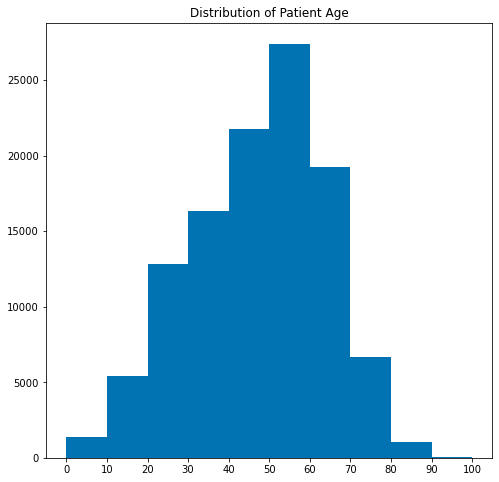

In [11]:
plt.figure(figsize=(8, 8))

bins = np.arange(0, 95+10, 10)

plt.hist(data_entry_df_copy1['patient_age'], bins=bins)

plt.xticks(bins)

plt.title('Distribution of Patient Age')

plt.show()

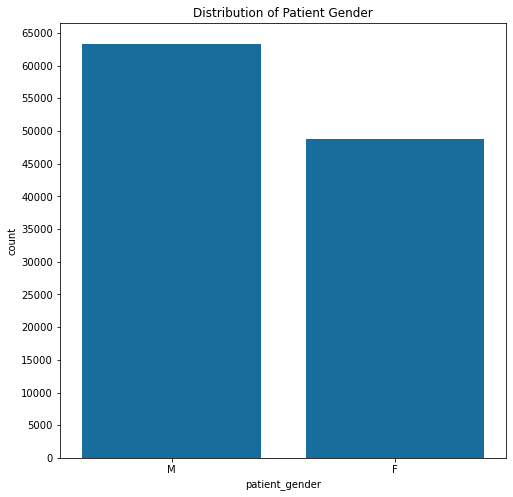

In [12]:
plt.figure(figsize=(8, 8))

bins = np.arange(0, 63340+5000, 5000)

sns.countplot(data=data_entry_df_copy1, x='patient_gender', color=base_color)

plt.yticks(bins)

plt.title('Distribution of Patient Gender')

plt.show()

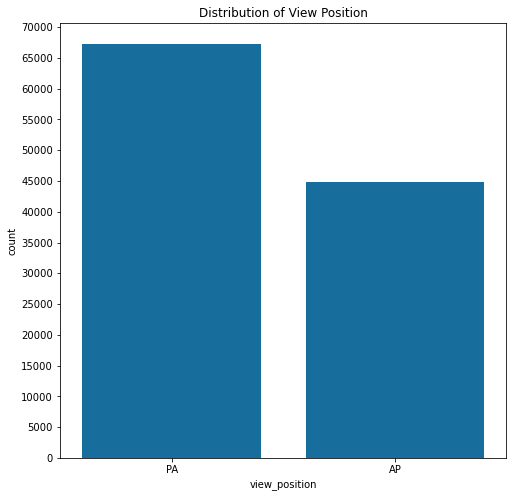

In [13]:
plt.figure(figsize=(8, 8))

bins = np.arange(0, 67310+5000, 5000)

sns.countplot(data=data_entry_df_copy1, x='view_position', color=base_color)

plt.yticks(bins)

plt.title('Distribution of View Position')

plt.show()

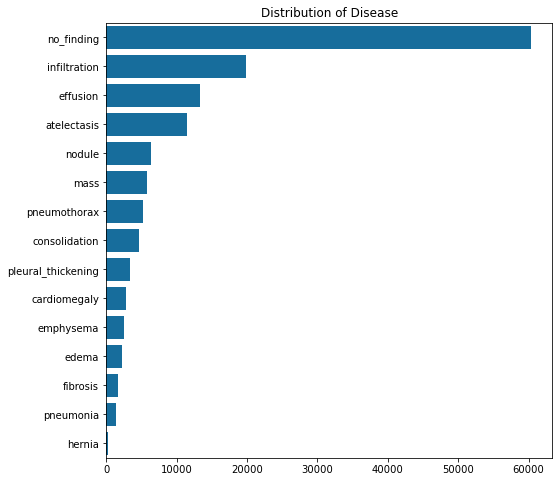

In [14]:
plt.figure(figsize=(8, 8))

finding_labels_sums = finding_labels_df.sum()

sns.barplot(
    x=finding_labels_sums,
    y=finding_labels_sums.keys(), 
    color=base_color,
    order=finding_labels_sums.sort_values(ascending=False).index
)

plt.title('Distribution of Disease')

plt.show()

In [15]:
finding_labels_counts = data_entry_df_copy1['finding_labels'].value_counts()

finding_labels_counts = finding_labels_counts.sort_values(ascending=False)

finding_labels_count_df = pd.DataFrame.from_dict(
    dict(finding_labels_counts), 
    orient='index',
    columns=['Count']
) 

finding_labels_count_df.head()

,Count
No Finding,60361
Infiltration,9547
Atelectasis,4215
Effusion,3955
Nodule,2705


In [16]:
def plot_distribution_of_finding_labels(start_index, end_index, title, xrange, fig_size):
    
    plt.figure(figsize=fig_size)

    sns.barplot(
        x=finding_labels_count_df['Count'][start_index:end_index],
        y=list(finding_labels_count_df.index)[start_index:end_index], 
        color=base_color,
        order=list(finding_labels_count_df.index)[start_index:end_index]
    )

    plt.xlim(xrange)

    plt.title(title)

    plt.show()

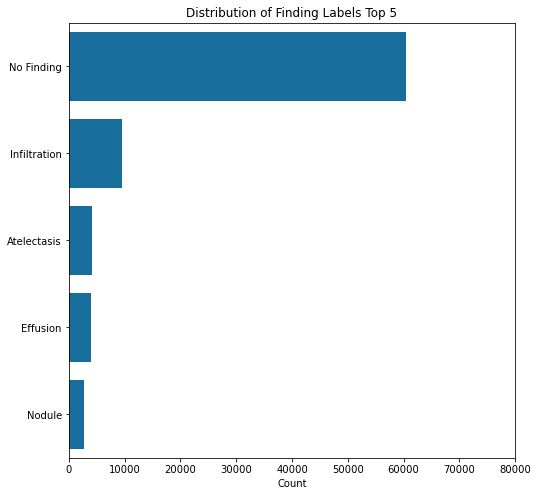

In [17]:
start_index = 0
end_index = 5
title = 'Distribution of Finding Labels Top 5'
xrange = (0, 80000)
fig_size=(8, 8)

plot_distribution_of_finding_labels(start_index, end_index, title, xrange, fig_size)

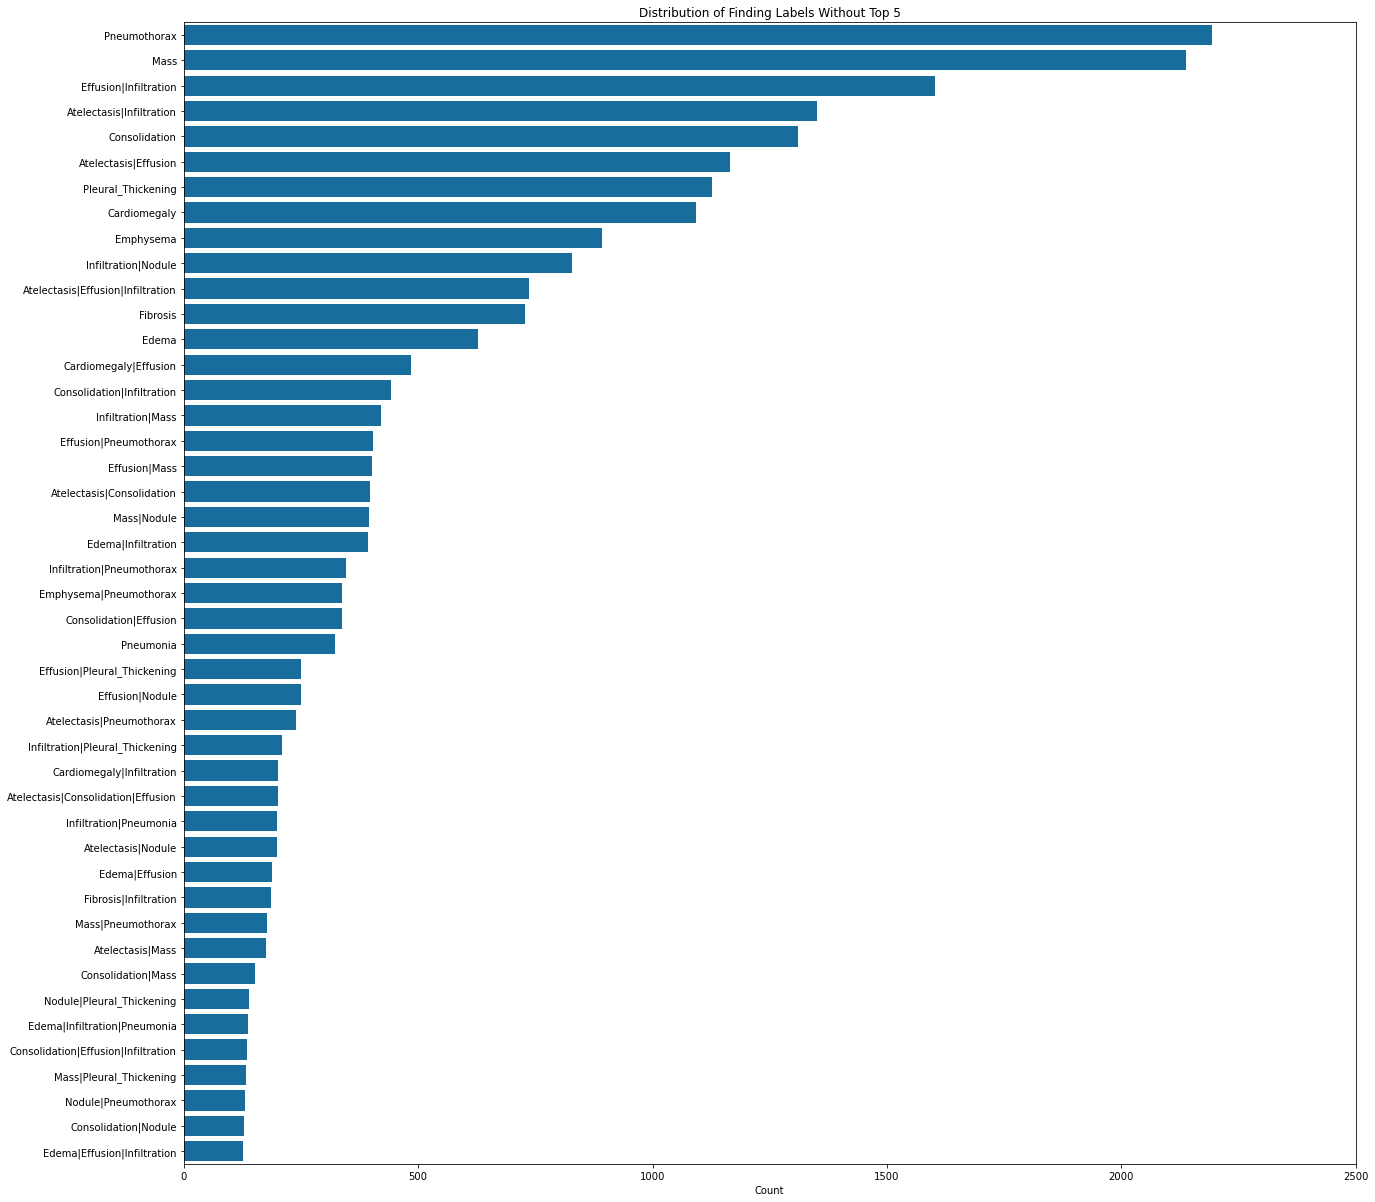

In [18]:
start_index = 5
end_index = 50
title = 'Distribution of Finding Labels Without Top 5'
xrange = (0, 2500)
fig_size=(21, 21)

plot_distribution_of_finding_labels(start_index, end_index, title, xrange, fig_size)

### Part II

In [19]:
sample_df = data_entry_df_copy1[data_entry_df_copy.image_index.isin(sample_labels_df_copy.image_index)]

In [20]:
processed_sample_labels_filepath = os.path.join('.', "processed_sample_labels.csv")
sample_df.to_csv (processed_sample_labels_filepath, index = True, header = True)

In [21]:
def plot_xray_images(image_filenames, columns, rows, show_pixel_intensity=False):
    
    figsize = (21, 21) if len(image_filenames) > 1 else (8, 8)

    fig = plt.figure(figsize=figsize)

    for i in tqdm(range(0, len(image_filenames))):

        filename, label = image_filenames[i]

        filepath = os.path.join(nih_sample_images_dir, filename)
        img = Image.open(filepath)

        fig.add_subplot(rows, columns, i+1)

        plt.title(label)
        
        if show_pixel_intensity:
            
            plt.hist(np.array(img).ravel(), bins = 256)
            
            plt.tight_layout(pad=1)
            
        else:
            
            plt.imshow(img, cmap='gray')
            
            plt.axis('off')
            
    plt.show()

In [22]:
def get_filtered_image_label_list(query_condition, columns, rows):
    
    sample_size = columns * rows
    
    filtered_df = sample_df.copy()
    
    if query_condition is not None:
        filtered_df = filtered_df.query(query_condition)
        
    
    if filtered_df.shape[0] > sample_size:
        filtered_df = filtered_df.sample(sample_size)

    image_filenames = list(zip(filtered_df.image_index, filtered_df.finding_labels))
    
    return image_filenames

100%|██████████| 32/32 [00:01<00:00, 20.97it/s]


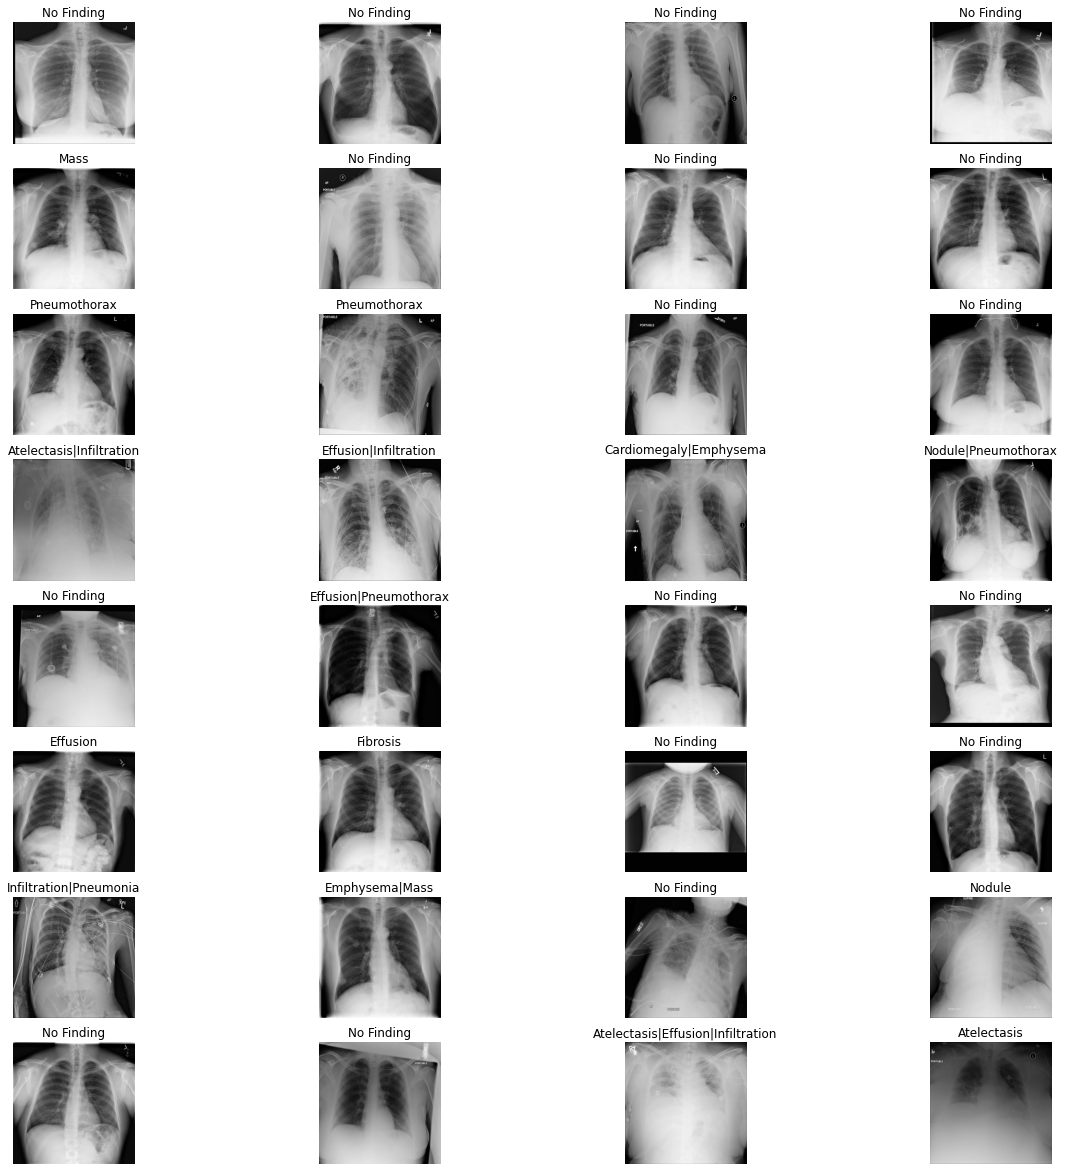

In [23]:
query_condition = None
columns = 4
rows = 8

image_filenames = get_filtered_image_label_list(query_condition, columns, rows)

plot_xray_images(image_filenames, columns, rows)

100%|██████████| 15/15 [00:00<00:00, 23.49it/s]


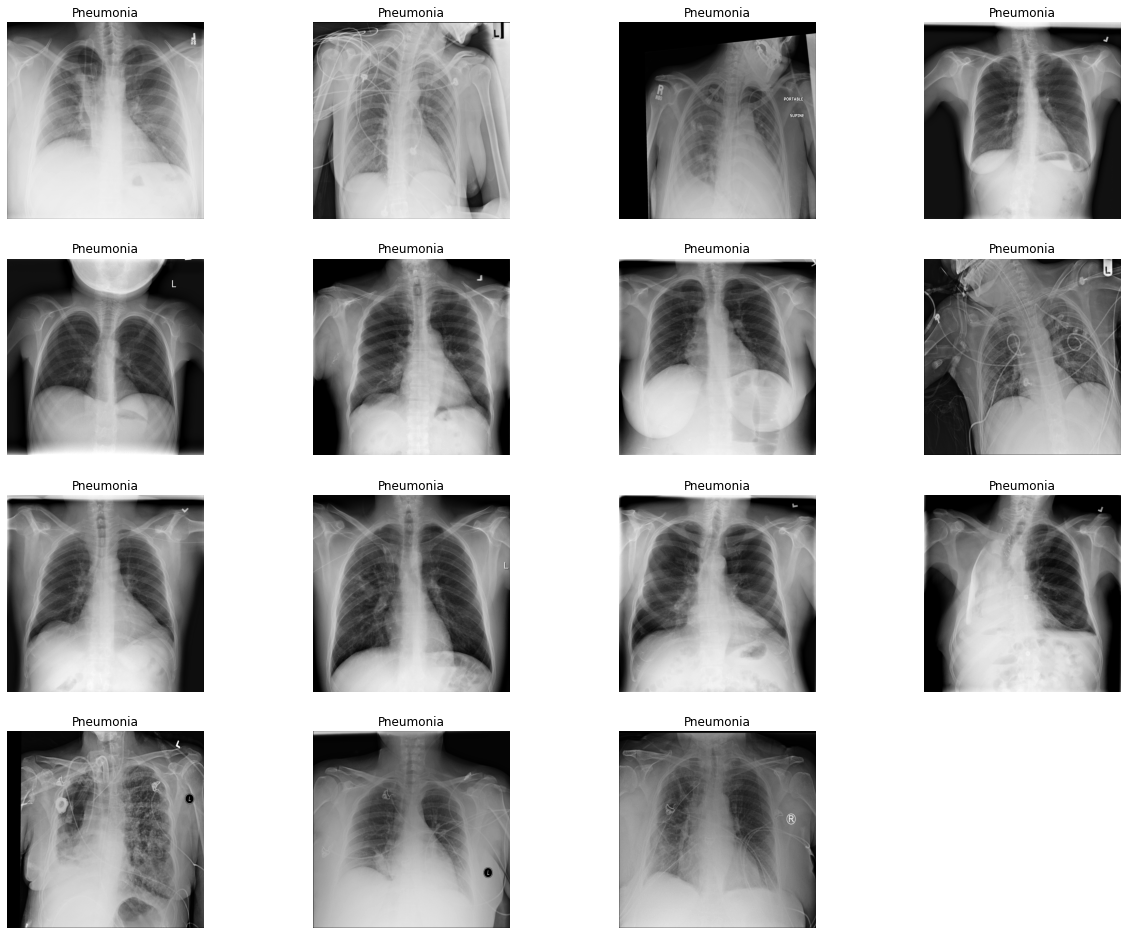

In [24]:
query_condition = 'num_labels==1 and pneumonia==1'
columns = 4
rows = 5

image_filenames = get_filtered_image_label_list(query_condition, columns, rows)

plot_xray_images(image_filenames, columns, rows)

100%|██████████| 15/15 [00:12<00:00,  1.18it/s]


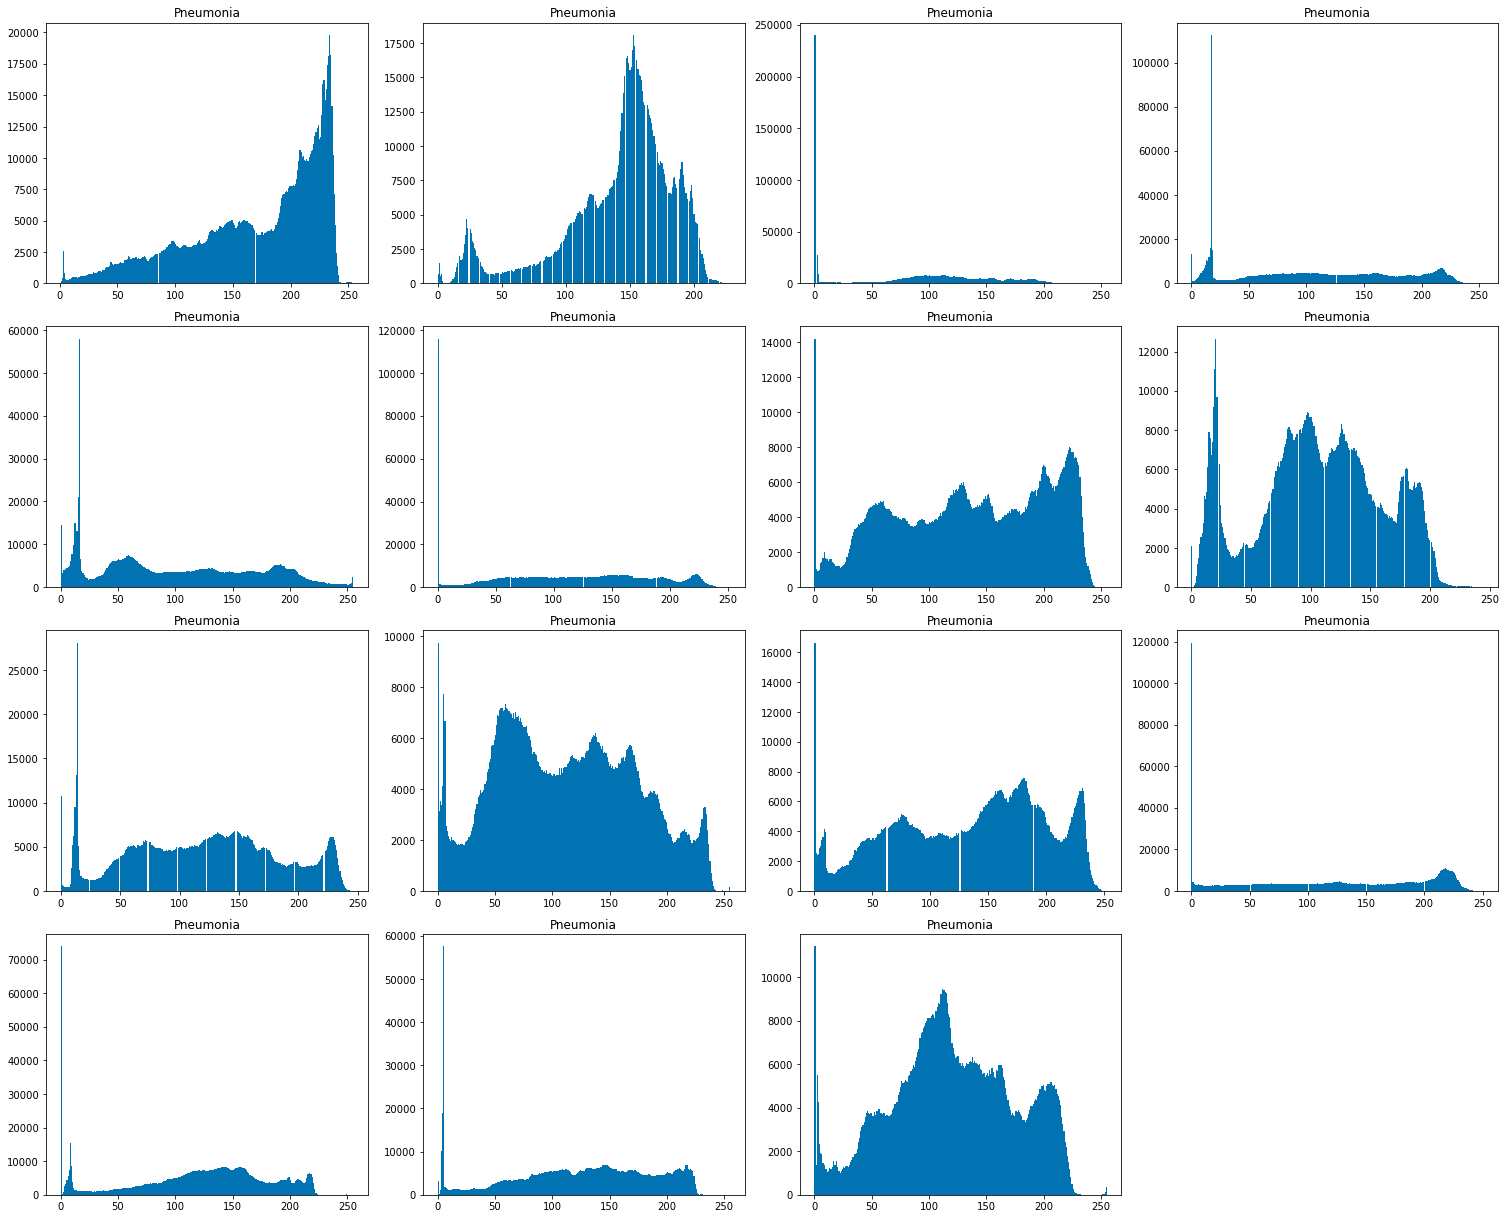

In [25]:
plot_xray_images(image_filenames, columns, rows, show_pixel_intensity=True)

100%|██████████| 20/20 [00:01<00:00, 14.72it/s]


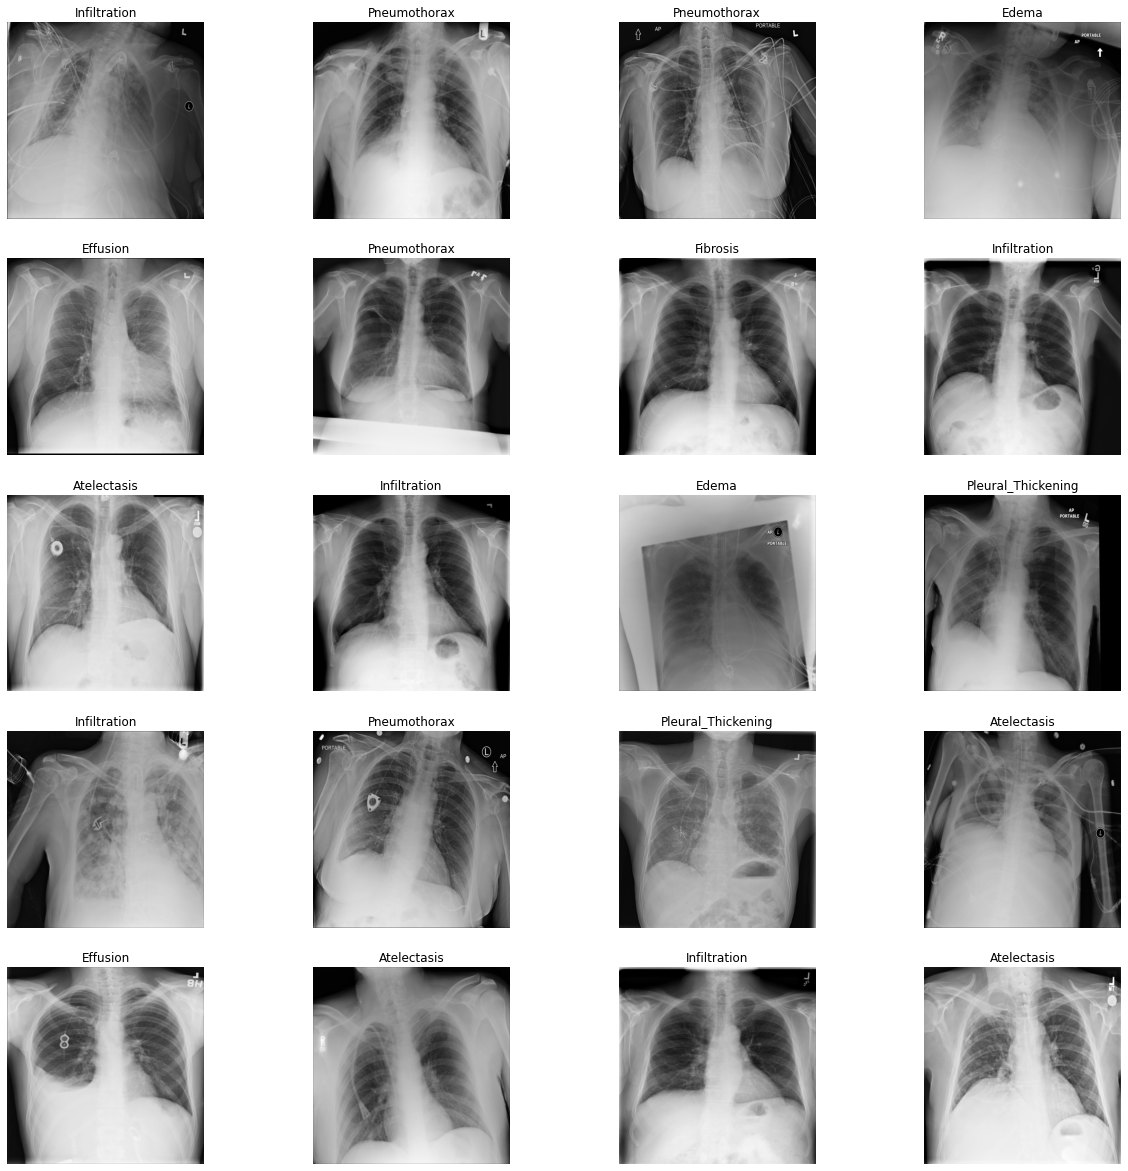

In [26]:
query_condition = 'pneumonia == 0 and num_labels==1'
columns = 4
rows = 5

image_filenames = get_filtered_image_label_list(query_condition, columns, rows)

plot_xray_images(image_filenames, columns, rows)

100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


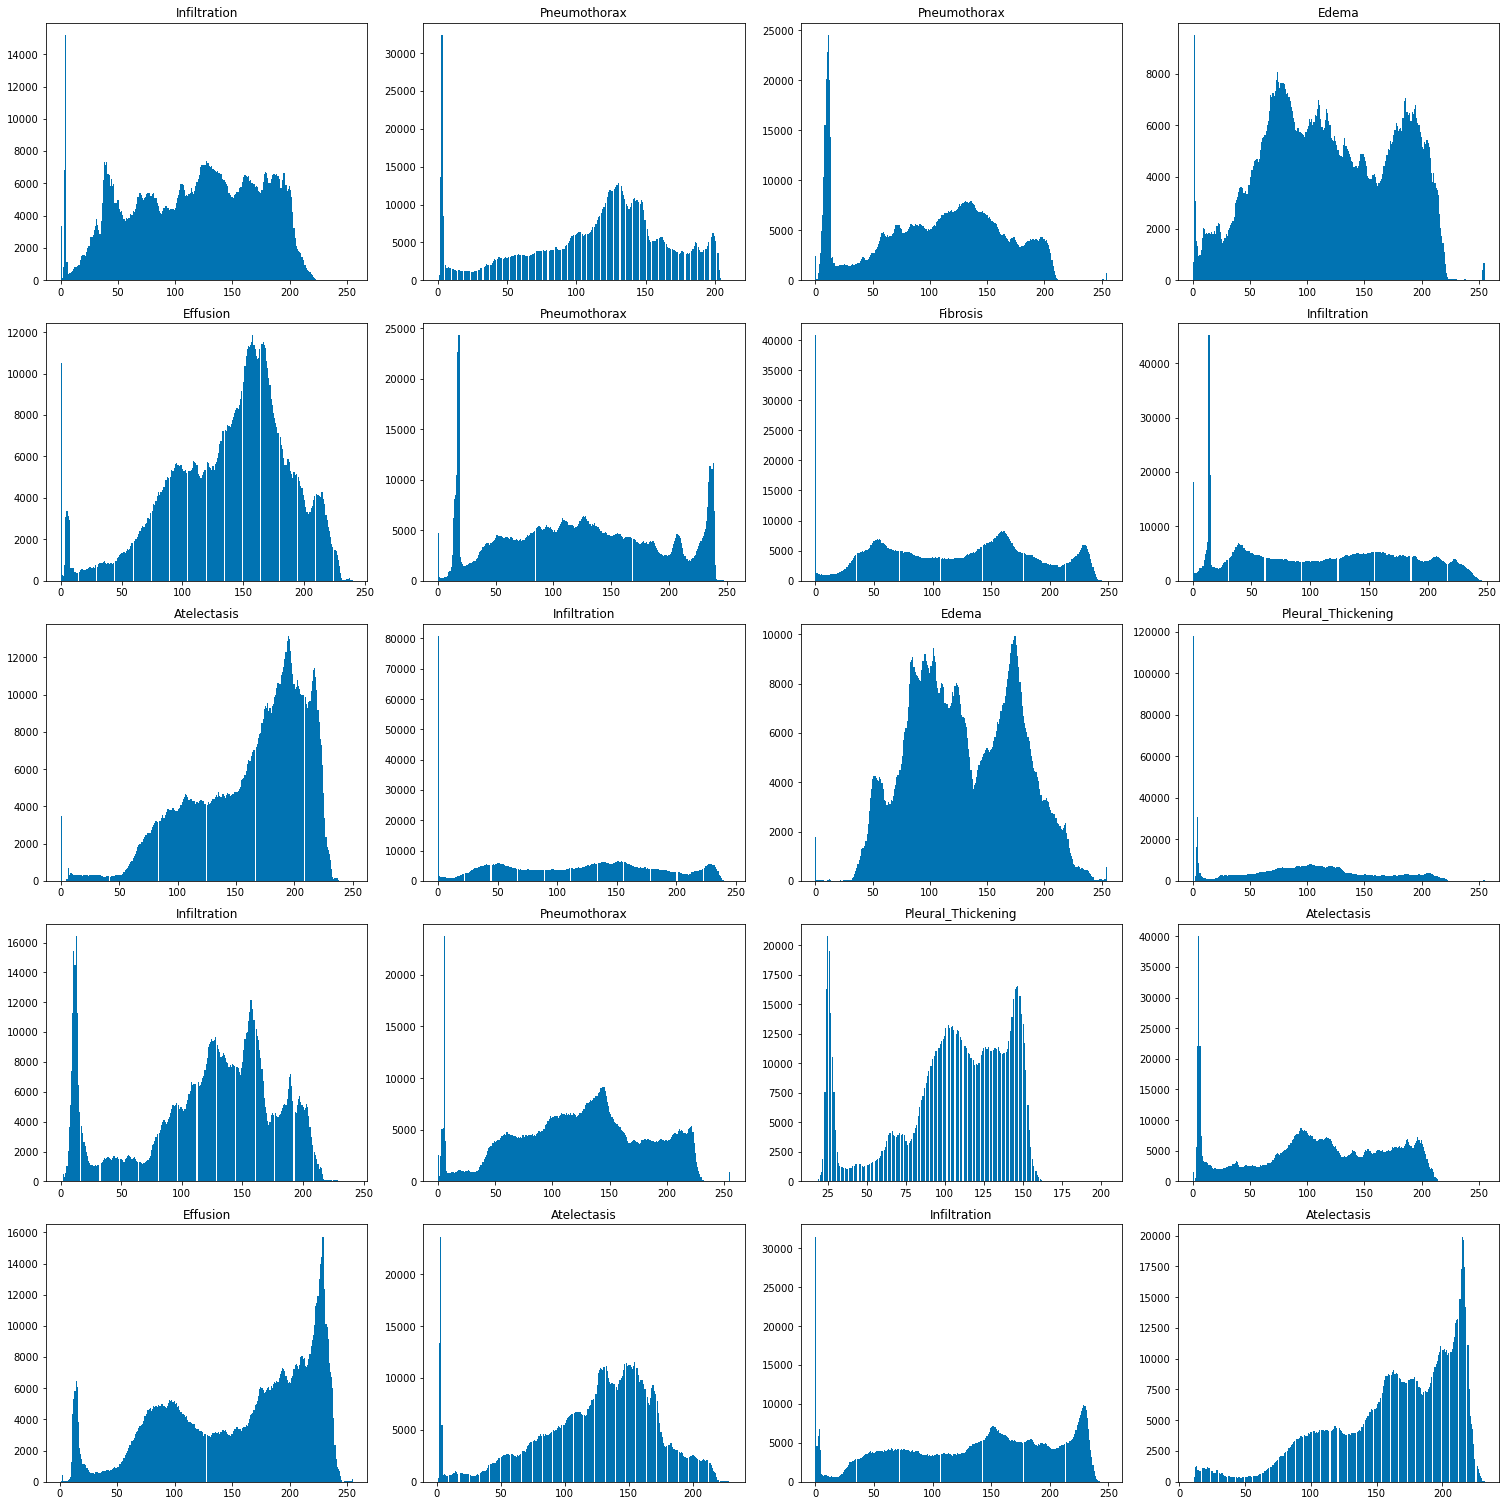

In [27]:
plot_xray_images(image_filenames, columns, rows, show_pixel_intensity=True)

---
---

### Part III

In [28]:
atelectasis_img_paths = sample_df.query('num_labels == 1 and atelectasis == 1').image_index
cardiomegaly_img_paths = sample_df.query('num_labels == 1 and cardiomegaly == 1').image_index
consolidation_img_paths = sample_df.query('num_labels == 1 and consolidation == 1').image_index
edema_img_paths = sample_df.query('num_labels == 1 and edema == 1').image_index
effusion_img_paths = sample_df.query('num_labels == 1 and effusion == 1').image_index
emphysema_img_paths = sample_df.query('num_labels == 1 and emphysema == 1').image_index
fibrosis_img_paths = sample_df.query('num_labels == 1 and fibrosis == 1').image_index
hernia_img_paths = sample_df.query('num_labels == 1 and hernia == 1').image_index
infiltration_img_paths = sample_df.query('num_labels == 1 and infiltration == 1').image_index
mass_img_paths = sample_df.query('num_labels == 1 and mass == 1').image_index
no_finding_img_paths = sample_df.query('num_labels == 0').image_index
nodule_img_paths = sample_df.query('num_labels == 1 and nodule == 1').image_index
pleural_thickening_img_paths = sample_df.query('num_labels == 1 and pleural_thickening == 1').image_index
pneumonia_img_paths = sample_df.query('num_labels == 1 and pneumonia == 1').image_index
pneumothorax_img_paths = sample_df.query('num_labels == 1 and pneumothorax == 1').image_index

In [29]:
def get_intensities(image_paths, thresh):
    
    intensities = []
    
    for img_path in tqdm(image_paths):
        
        filepath = os.path.join(nih_sample_images_dir, img_path)
        
        img = plt.imread(filepath)
        
        img_mask = (img > thresh)
        
        intensities.extend(img[img_mask].tolist())
        
    return intensities

In [30]:
def plot_intensities(insensities_label_list, columns=4, rows=5):
    
    figsize = (21, 21) 

    fig = plt.figure(figsize=figsize)

    for i in tqdm(range(0, len(insensities_label_list))):
        
        label, insensities = insensities_label_list[i]

        fig.add_subplot(rows, columns, i+1)

        plt.hist(insensities, bins = 256)
        
        plt.title(label)
  
    plt.show()

In [31]:
THRESH = 0.98

pneumonia_intensities = get_intensities(pneumonia_img_paths, THRESH)
atelectasis_intensities = get_intensities(atelectasis_img_paths, THRESH)
cardiomegaly_intensities = get_intensities(cardiomegaly_img_paths, THRESH)
consolidation_intensities = get_intensities(consolidation_img_paths, THRESH)
edema_intensities = get_intensities(edema_img_paths, THRESH)
effusion_intensities = get_intensities(effusion_img_paths, THRESH)
emphysema_intensities = get_intensities(emphysema_img_paths, THRESH)
fibrosis_intensities = get_intensities(fibrosis_img_paths, THRESH)
hernia_intensities = get_intensities(hernia_img_paths, THRESH)
infiltration_intensities = get_intensities(infiltration_img_paths, THRESH)
mass_intensities = get_intensities(mass_img_paths, THRESH)
nodule_intensities = get_intensities(nodule_img_paths, THRESH)
pleural_thickening_intensities = get_intensities(pleural_thickening_img_paths, THRESH)
pneumothorax_intensities = get_intensities(pneumothorax_img_paths, THRESH)

100%|██████████| 114/114 [00:02<00:00, 40.67it/s]


100%|██████████| 14/14 [00:04<00:00,  3.01it/s]


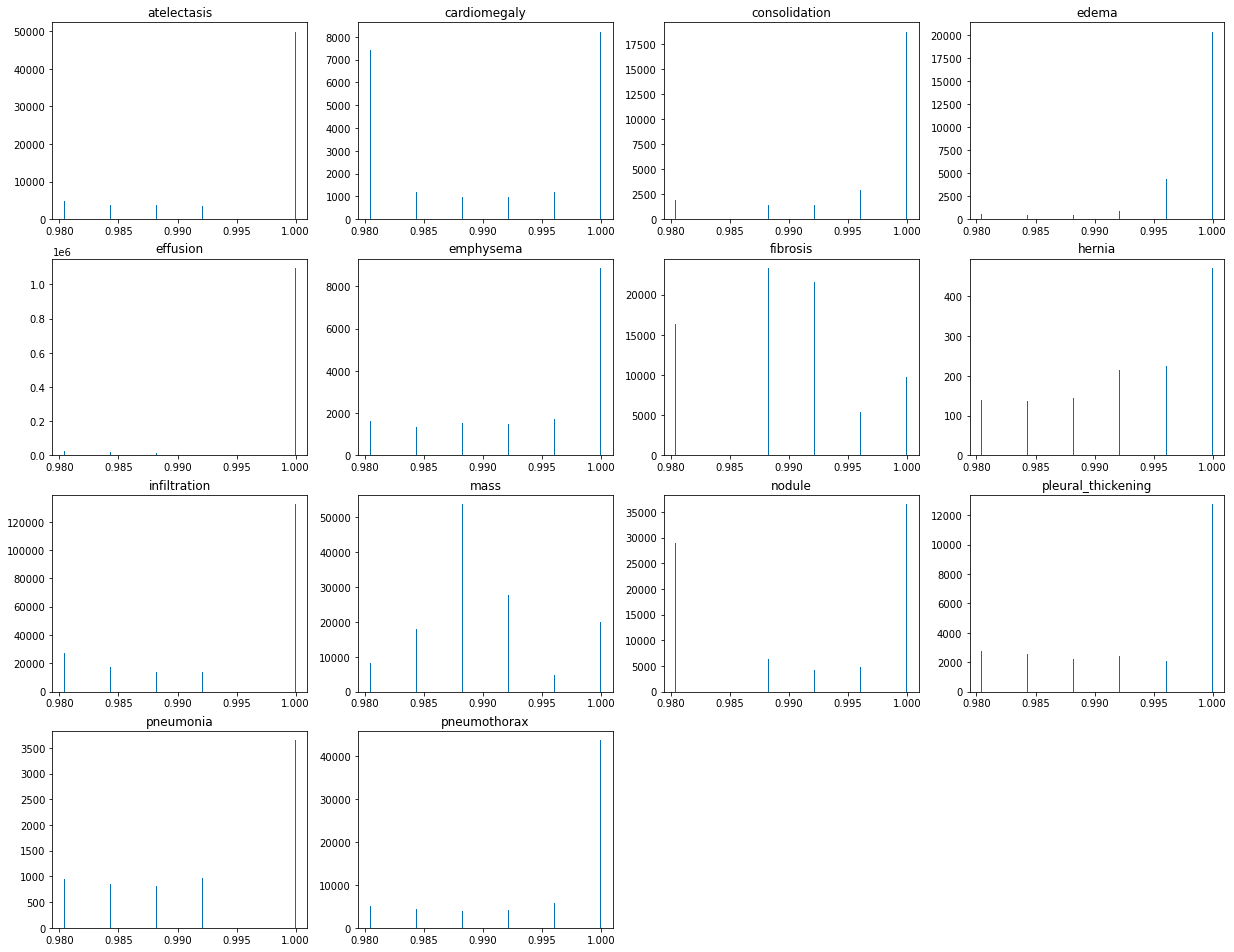

In [32]:
insensities_list = [
    atelectasis_intensities,
    cardiomegaly_intensities,
    consolidation_intensities,
    edema_intensities,
    effusion_intensities,
    emphysema_intensities,
    fibrosis_intensities,
    hernia_intensities,
    infiltration_intensities,
    mass_intensities,
    nodule_intensities,
    pleural_thickening_intensities,
    pneumonia_intensities,
    pneumothorax_intensities
]

label_list = list(finding_labels_df.columns)

label_list.remove('no_finding')

plot_intensities(list(zip(label_list, insensities_list)))

* Threshold: 0.98
* Excludes: Atelectasis, Infiltration